# Project 4 OpenClassroom

SEA Building Energy Benchmarking
Explore Open Data from the City of Seattle
https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv

https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m
https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
#To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

# To be able to use Warning
import warnings

import string

import timeit
import time

# To be able to use WorldCloud
from wordcloud import WordCloud, STOPWORDS 


from sklearn import model_selection
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from math import sqrt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import sklearn

print("Sklearn Version :"+sklearn.__version__)

Python Version :sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.1
Pandas Version :1.0.1
Seaborn Version :0.10.0
Sklearn Version :0.22.1


### Init of the main variables

In [2]:
#Disable the warnings "ignore"
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
#text_data=['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType','ComplianceStatus']
#numeric_data=['Latitude','Longitude','YearBuilt','NumberofBuildings','NumberofFloors']

#encoding='LabelEncoding'
encoding='TargetEncoding'
#encoding='OneHotEncoding'

output='energy'
#output='ghg'

dataconvertion="normalisation"
#dataconvertion="standardisation"

In [3]:
SmartData = pd.read_csv('SmartData.csv', sep=",", header=0)


In [4]:
SmartData

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus,IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSiteEnergyUse(kBtu),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsTotalGHGEmissions,IsGHGEmissionsIntensity,IsOtherFuelUse(kBtu),ChangeENERGYSTARScore,ChangeBuildingType,ChangePrimaryPropertyType,ChangeNeighborhood,ChangeLargestPropertyUseType,ChangeSecondLargestPropertyUseType,ChangeThirdLargestPropertyUseType,ChangeComplianceStatus,LE_BuildingType,LE_Neighborhood,LE_PrimaryPropertyType,LE_LargestPropertyUseType,LE_SecondLargestPropertyUseType,LE_ThirdLargestPropertyUseType,OHE_BuildingType_0,OHE_BuildingType_1,OHE_BuildingType_2,OHE_BuildingType_3,OHE_BuildingType_4,OHE_BuildingType_5,OHE_BuildingType_6,OHE_BuildingType_7,OHE_Neighborhood_0,OHE_Neighborhood_1,OHE_Neighborhood_2,OHE_Neighborhood_3,OHE_Neighborhood_4,OHE_Neighborhood_5,OHE_Neighborhood_6,OHE_Neighborhood_7,OHE_Neighborhood_8,OHE_Neighborhood_9,OHE_Neighborhood_10,OHE_Neighborhood_11,OHE_Neighborhood_12,OHE_PrimaryPropertyType_0,OHE_PrimaryPropertyType_1,OHE_PrimaryPropertyType_2,OHE_PrimaryPropertyType_3,OHE_PrimaryPropertyType_4,OHE_PrimaryPropertyType_5,OHE_PrimaryPropertyType_6,OHE_PrimaryPropertyType_7,OHE_PrimaryPropertyType_8,OHE_PrimaryPropertyType_9,OHE_PrimaryPropertyType_10,OHE_PrimaryPropertyType_11,OHE_PrimaryPropertyType_12,OHE_PrimaryPropertyType_13,OHE_PrimaryPropertyType_14,OHE_PrimaryPropertyType_15,OHE_PrimaryPropertyType_16,OHE_PrimaryPropertyType_17,OHE_PrimaryPropertyType_18,OHE_PrimaryPropertyType_19,OHE_PrimaryPropertyType_20,OHE_PrimaryPropertyType_21,OHE_PrimaryPropertyType_22,OHE_LargestPropertyUseType_0,OHE_LargestPropertyUseType_1,OHE_LargestPropertyUseType_2,OHE_LargestPropertyUseType_3,OHE_LargestPropertyUseType_4,OHE_LargestPropertyUseType_5,OHE_LargestPropertyUseType_6,OHE_LargestPropertyUseType_7,OHE_LargestPropertyUseType_8,OHE_LargestPropertyUseType_9,OHE_LargestPropertyUseType_10,OHE_LargestPropertyUseType_11,OHE_LargestPropertyUseType_12,OHE_LargestPropertyUseType_13,OHE_LargestPropertyUseType_14,OHE_LargestPropertyUseType_15,OHE_LargestPropertyUseType_16,OHE_LargestPropertyUseType_17,OHE_LargestPropertyUseType_18,OHE_LargestPropertyUseType_19,OHE_LargestPropertyUseType_20,OHE_LargestPropertyUseType_21,OHE_LargestPropertyUseType_22,OHE_LargestPropertyUseType_23,OHE_LargestPropertyUseType_24,OHE_LargestPropertyUseType_25,OHE_LargestPropertyUseType_26,OHE_LargestPropertyUseType_27,OHE_LargestPropertyUseType_28,OHE_LargestPropertyUseType_29,OHE_LargestPropertyUseType_30,OHE_LargestPropertyUseType_31,OHE_LargestPropertyUseType_32,OHE_LargestPropertyUseType_33,OHE_LargestPropertyUseType_34,OHE_LargestPropertyUseType_35,OHE_LargestPropertyUseType_36,OHE_LargestPropertyUseType_37,OHE_LargestPropertyUseType_38,OHE_LargestPropertyUseType_39,OHE_LargestPropertyUseType_40,OHE_LargestPropertyUseType_41,OHE_LargestPropertyUseType_42,OHE_LargestPropertyUseType_43,OHE_LargestPropertyUseType_44,OHE_LargestPropertyUseType_45,OHE_LargestPropertyUseType_46,OHE_LargestPropertyUseType_47,OHE_LargestPropertyUseType_48,OHE_LargestPropertyUseType_49,OHE_LargestPropertyUseType_50,OHE_La

### Selection of the appropriate columns

In [5]:
#SmartData=SmartData[SmartData['ChangeOutliers']!=True]

In [6]:


# Contains all the parameters
#inputcolumns=['idBuildingType', 'idNeighborhood', 'idPrimaryPropertyType','idLargestPropertyUseType', 'idSecondLargestPropertyUseType','idThirdLargestPropertyUseType','IsSiteEUI(kBtu/sf)', 'IsSourceEUI(kBtu/sf)', 'IsSiteEnergyUse(kBtu)','IsSteamUse(kBtu)', 'IsElectricity(kBtu)', 'IsNaturalGas(kBtu)','IsTotalGHGEmissions', 'IsGHGEmissionsIntensity','IsOtherFuelUse(kBtu)']
# No 'IsTotalGHGEmissions', , 'IsSiteEnergyUse(kBtu)'
#inputcolumns=['idBuildingType', 'idNeighborhood', 'idPrimaryPropertyType','idLargestPropertyUseType', 'idSecondLargestPropertyUseType','idThirdLargestPropertyUseType','IsSiteEUI(kBtu/sf)', 'IsSourceEUI(kBtu/sf)','IsSteamUse(kBtu)', 'IsElectricity(kBtu)', 'IsNaturalGas(kBtu)', 'IsGHGEmissionsIntensity','IsOtherFuelUse(kBtu)']
# No 'IsTotalGHGEmissions', , 'IsSiteEnergyUse(kBtu)', 'idNeighborhood'
#standardcolumns=['IsSiteEUI(kBtu/sf)', 'IsSourceEUI(kBtu/sf)','IsSteamUse(kBtu)', 'IsElectricity(kBtu)', 'IsNaturalGas(kBtu)', 'IsGHGEmissionsIntensity','IsOtherFuelUse(kBtu)']
rowdatacolumns=['ENERGYSTARScore','NumberofBuildings','NumberofFloors','PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)']

standardcolumns=rowdatacolumns+['IsSiteEUI(kBtu/sf)', 'IsSourceEUI(kBtu/sf)','IsSteamUse(kBtu)', 'IsElectricity(kBtu)', 'IsNaturalGas(kBtu)', 'IsGHGEmissionsIntensity']

SmartDataBackup=SmartData

if (encoding=='LabelEncoding'):
    inputcolumns=standardcolumns+SmartData.columns[SmartData.columns.str.contains(pat = 'LE_')].tolist()
elif (encoding=='OneHotEncoding'):
    inputcolumns=standardcolumns+SmartData.columns[SmartData.columns.str.contains(pat = 'OHE_')].tolist()
elif (output=='ghg'):
     inputcolumns=standardcolumns+SmartData.columns[SmartData.columns.str.contains(pat = 'TE_TotalGHGEmissions')].tolist()
else: 
    inputcolumns=standardcolumns+SmartData.columns[SmartData.columns.str.contains(pat = 'TE_SiteEnergy')].tolist()
    
if (output=='ghg'):
    outputcolumns=['TotalGHGEmissions']
   
    SmartDataToGenerate=SmartData[SmartData['TotalGHGEmissions']==0]
    SmartData=SmartData[SmartData['TotalGHGEmissions']!=0]
else:
    outputcolumns=['SiteEnergyUse(kBtu)']
    SmartDataToGenerate=SmartData[SmartData['SiteEnergyUse(kBtu)']==0]
    SmartData=SmartData[SmartData['SiteEnergyUse(kBtu)']!=0]
    

print("Input columns"+str(len(inputcolumns)))

Input columns18


In [7]:
encoding

'TargetEncoding'

In [8]:
inputcolumns

['ENERGYSTARScore',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'IsSiteEUI(kBtu/sf)',
 'IsSourceEUI(kBtu/sf)',
 'IsSteamUse(kBtu)',
 'IsElectricity(kBtu)',
 'IsNaturalGas(kBtu)',
 'IsGHGEmissionsIntensity',
 'TE_SiteEnergyUse(kBtu)_BuildingType',
 'TE_SiteEnergyUse(kBtu)_Neighborhood',
 'TE_SiteEnergyUse(kBtu)_PrimaryPropertyType',
 'TE_SiteEnergyUse(kBtu)_LargestPropertyUseType',
 'TE_SiteEnergyUse(kBtu)_SecondLargestPropertyUseType',
 'TE_SiteEnergyUse(kBtu)_ThirdLargestPropertyUseType']

### Split the data to analyse

In [9]:
X = SmartData[inputcolumns]
#X = SmartData

# Standarisation
#std_scale = preprocessing.StandardScaler().fit(X)

#X_scale = std_scale.transform(X)

# Normalisation 

X_scale=preprocessing.normalize(X, norm='l2')

y = SmartData[outputcolumns] 
y_trans = np.log1p(y)
#X_train, X_test, y_train, y_test = train_test_split(X_scale, y_trans, test_size=0.33)

#X_train, X_test, y_train, y_test = train_test_split(
 #   X_scale, y_trans, test_size=0.33, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(
 #   X_train, y_train, test_size=0.25, random_state=1)

In [10]:
X

,ENERGYSTARScore,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsGHGEmissionsIntensity,TE_SiteEnergyUse(kBtu)_BuildingType,TE_SiteEnergyUse(kBtu)_Neighborhood,TE_SiteEnergyUse(kBtu)_PrimaryPropertyType,TE_SiteEnergyUse(kBtu)_LargestPropertyUseType,TE_SiteEnergyUse(kBtu)_SecondLargestPropertyUseType,TE_SiteEnergyUse(kBtu)_ThirdLargestPropertyUseType
0,60.0,1.0,12.0,88434,0,88434,True,True,True,True,True,True,2520701.125,3937051.50,6.632313e+06,6715187.0,1404253.75,1593002.0
1,61.0,1.0,11.0,103566,15064,88502,True,True,False,True,True,True,2520701.125,3937051.50,6.632313e+06,6715187.0,2303386.00,3806397.5
2,43.0,1.0,41.0,956110,196718,759392,True,True,True,True,True,True,2520701.125,3937051.50,6.632313e+06,6715187.0,2303386.00,5170809.5
3,56.0,1.0,10.0,61320,0,61320,True,True,True,True,True,True,2520701.125,3937051.50,6.632313e+06,6715187.0,1404253.75,1593002.0
4,75.0,1.0,18.0,175580,62000,113580,True,True,False,True,True,True,2520701.125,3937051.50,6.632313e+06,6715187.0,2303386.00,5170809.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,71.0,1.0,4.0,44650,0,44650,True,True,False,True,False,True,965786.000,3937051.50,9.534322e+05,1314357.0,1404253.75,1593002.0
6712,98.0,1.0,7.0,42393,0,42393,True,True,False,True,True,True,2000488.125,1587454.75,1.972396e+06,1314357.0,1404253.75,1593002.0
6713,79.0,1.0,40.0,319481,41915,277566,True,True,False,True,True,True,6750112.000,3937051.50,6.461452e+06,1314357.0,8673966.50,3635600.0
6714,44.0,1.0,3.0,48230,0,48230,True,True,False,True,False,True,965786.000,1587454.75,9.534322e+05,1314357.0,2303386.00,1593002.0


### Data convertion in the appropriate format

In [11]:
def transformInputOuput(myType,mySmartData,myInputColumns,myOutputColumns):
    myX=mySmartData[myInputColumns]
    if (myType=="standardisation"):
        mystd_scale = preprocessing.StandardScaler().fit(myX)
        myX_scale = mystd_scale.transform(myX)
    else:
        myX_scale = preprocessing.normalize(myX, norm='l2')
    
    myy = mySmartData[myOutputColumns] 
    myy_trans = np.log1p(myy)
    return myX_scale,myy_trans
    

In [12]:
X_scale, y_trans=transformInputOuput(dataconvertion,SmartData,inputcolumns,outputcolumns)

In [13]:
#X_train_std

### Function that implements a model with data split among training data and test data

In [14]:
def metaModel(myX_train, myy_train,myX_test,myy_test,mylr):
    # The model is trained
    t0=time.time()
    mylr.fit(myX_train,myy_train)
    #t=timeit.Timer("mylr.fit(myX_train,myy_train)", globals=globals())
    print("Training time:", round(time.time()-t0, 3), "s") # the time would be round to 3 decimal in seconds
    
    
    
    
    pred_train_rr= mylr.predict(myX_train)
    print("RMSE "+str(np.sqrt(mean_squared_error(myy_train,pred_train_rr))))
    print("R2 :"+str(r2_score(myy_train, pred_train_rr)))

    pred_test_rr= mylr.predict(myX_test)
    print("RMSE "+str(np.sqrt(mean_squared_error(myy_test,pred_test_rr)))) 
    print("R2 :"+str(r2_score(myy_test, pred_test_rr)))

### Function that computes mean_absolute_percentage_error

In [15]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Function that computes Symmetric mean absolute percentage error

In [16]:
def symmetric_mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_pred - y_true) )/ ((np.abs(y_true))+np.abs(y_pred))/2) * 100

### Function that implements a model with cross validation

In [17]:
def metaModelWithCrossValidation(myX,myY,mylr,mydf):
    numberofcv=5
    model_name = type(mylr).__name__
    mydict=dict()
    mydict['model_name']=model_name
    #all_accuracies = cross_validate(estimator=mylr, X=myX, y=myY, scoring = ['r2', 'explained_variance','neg_root_mean_squared_error'], cv=10)
    all_accuracies = cross_validate(estimator=mylr, X=myX, y=myY, scoring = {'R2':'r2','Variance': 'explained_variance','RMSE':'neg_root_mean_squared_error'}, cv=numberofcv)
    
   # print("Training time:", round(time.time()-t0, 3), "s") # the time would be round to 3 decimal in seconds
    for key in all_accuracies:
        print(str(key)+ " "+str(all_accuracies.get(key).mean()))
        mydict[key]=all_accuracies.get(key).mean()
      
    print(mydict)
    mydf=mydf.append(mydict,ignore_index=True)
    print(mydf)
    # cross_val_predict returns an array of the same size as `y` where each entry
    # is a prediction obtained by cross validation:
    predicted = cross_val_predict(mylr, myX, myY, cv=numberofcv)
    
    fig, ax = plt.subplots()
    ax.scatter(myY, predicted, edgecolors=(0, 0, 0))
    ax.plot([myY.min(), myY.max()], [myY.min(), myY.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    ax.set_title('Comparison between Measured and Prediction data for '+model_name)
    ax.figure.savefig("./"+output+"_"+encoding+"_"+model_name+".png")
    
    fig, bx = plt.subplots()
    bx.scatter(np.expm1(myY),np.expm1(predicted), edgecolors=(0, 0, 0))
    bx.plot([np.expm1(myY).min(),np.expm1(myY).max()], [np.expm1(myY).min(), np.expm1(myY).max()], 'k--', lw=4)
    bx.set_xlabel('Measured')
    bx.set_ylabel('Predicted')
    bx.set_title('Comparison between Measured and Prediction data for '+model_name+' without log')
    print("R2 score with no log: "+str(r2_score(np.expm1(myY),np.expm1(predicted))))
    print("SMAPE with no log : "+ str(symmetric_mean_absolute_percentage_error(np.expm1(myY),np.expm1(predicted))))
    bx.figure.savefig("./"+output+"_"+encoding+"_"+model_name+"_no_log.png")
   # ax.set_xscale("log")
    plt.show()
    return mydf

### Removal of the outliers

In [18]:
if (output=='energy'):
    #print(SmartData.nlargest(20, ['SiteEnergyUse(kBtu)']))
    SmartDataWithNoOutliers=SmartData.drop(SmartData.nlargest(20, outputcolumns).index.tolist())
    
else:
    #print(SmartData.loc[(SmartData['TotalGHGEmissions']>16000)|(SmartData['TotalGHGEmissions'] == 11140.56)])
    SmartDataWithNoOutliers=SmartData.drop(SmartData.loc[(SmartData['TotalGHGEmissions']>16000)|(SmartData['TotalGHGEmissions'] == 11140.56)].index.tolist())
    
X_scale_no_outliers, y_trans_no_outliers=transformInputOuput(dataconvertion,SmartDataWithNoOutliers,inputcolumns,outputcolumns)


### Data to estimate 

In [19]:
X_scale_to_generate, y_trans_to_generate=transformInputOuput(dataconvertion,SmartDataToGenerate,inputcolumns,outputcolumns)

### Dummy Regression

fit_time 0.004829597473144531
score_time 0.006146717071533203
test_R2 -0.2197149936917311
test_Variance 0.0
test_RMSE -1.1850559370448763
{'model_name': 'DummyRegressor', 'fit_time': 0.004829597473144531, 'score_time': 0.006146717071533203, 'test_R2': -0.2197149936917311, 'test_Variance': 0.0, 'test_RMSE': -1.1850559370448763}
   fit_time      model_name  score_time   test_R2  test_RMSE  test_Variance
0   0.00483  DummyRegressor    0.006147 -0.219715  -1.185056            0.0
R2 score with no log: -0.032802711623763914
SMAPE with no log : 19.13150418493563


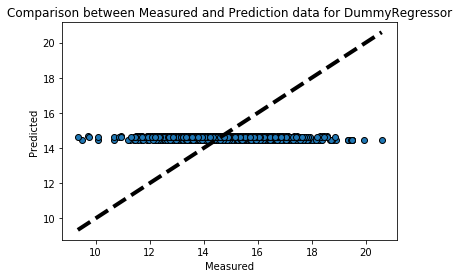

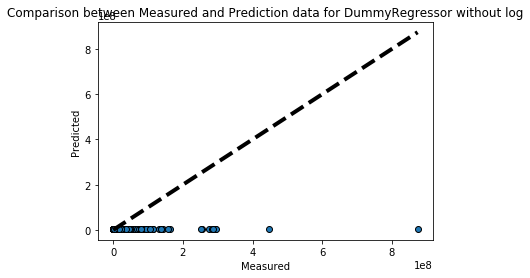

In [20]:
kpi_df=pd.DataFrame()
dm = DummyRegressor()


#metaModel(X_train, y_train,X_test,y_test,dm)

kpi_df=metaModelWithCrossValidation(X_scale,y_trans,dm,kpi_df)

### Linear Regression

fit_time 0.013301277160644531
score_time 0.008251094818115234
test_R2 0.5888779391274305
test_Variance 0.5996854673883378
test_RMSE -0.680510192337754
{'model_name': 'LinearRegression', 'fit_time': 0.013301277160644531, 'score_time': 0.008251094818115234, 'test_R2': 0.5888779391274305, 'test_Variance': 0.5996854673883378, 'test_RMSE': -0.680510192337754}
   fit_time        model_name  score_time   test_R2  test_RMSE  test_Variance
0  0.004830    DummyRegressor    0.006147 -0.219715  -1.185056       0.000000
1  0.013301  LinearRegression    0.008251  0.588878  -0.680510       0.599685
R2 score with no log: -3176819296.8711805
SMAPE with no log : 11.069267838274802


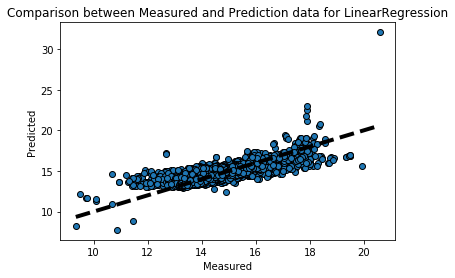

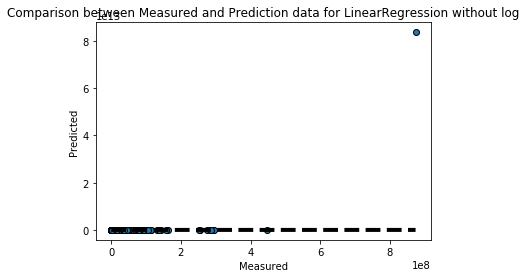

In [21]:
lr = LinearRegression()

#metaModel(X_train, y_train,X_test,y_test,lr)

kpi_df=metaModelWithCrossValidation(X_scale,y_trans,lr,kpi_df)

### Ridge Regression

fit_time 0.010152006149291992
score_time 0.006155061721801758
test_R2 0.45010185614378856
test_Variance 0.48264579391729623
test_RMSE -0.7874377613374246
{'model_name': 'Ridge', 'fit_time': 0.010152006149291992, 'score_time': 0.006155061721801758, 'test_R2': 0.45010185614378856, 'test_Variance': 0.48264579391729623, 'test_RMSE': -0.7874377613374246}
   fit_time        model_name  score_time   test_R2  test_RMSE  test_Variance
0  0.004830    DummyRegressor    0.006147 -0.219715  -1.185056       0.000000
1  0.013301  LinearRegression    0.008251  0.588878  -0.680510       0.599685
2  0.010152             Ridge    0.006155  0.450102  -0.787438       0.482646
R2 score with no log: -27828.771400058817
SMAPE with no log : 13.518975939507616


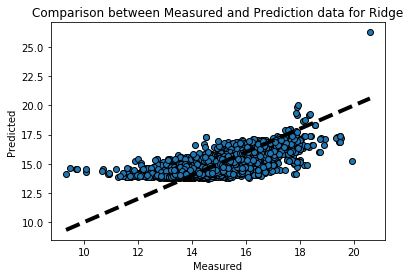

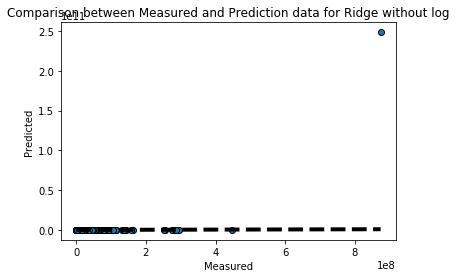

In [22]:
lrridge=Ridge()

#metaModel(X_train, y_train,X_test,y_test,lrridge)
kpi_df=metaModelWithCrossValidation(X_scale,y_trans,lrridge,kpi_df)

### Ridge Regression without outliers

fit_time 0.007202291488647461
score_time 0.00674586296081543
test_R2 0.4463390369988396
test_Variance 0.4800713903354124
test_RMSE -0.7739156956610996
{'model_name': 'Ridge', 'fit_time': 0.007202291488647461, 'score_time': 0.00674586296081543, 'test_R2': 0.4463390369988396, 'test_Variance': 0.4800713903354124, 'test_RMSE': -0.7739156956610996}
   fit_time        model_name  score_time   test_R2  test_RMSE  test_Variance
0  0.004830    DummyRegressor    0.006147 -0.219715  -1.185056       0.000000
1  0.013301  LinearRegression    0.008251  0.588878  -0.680510       0.599685
2  0.010152             Ridge    0.006155  0.450102  -0.787438       0.482646
3  0.007202             Ridge    0.006746  0.446339  -0.773916       0.480071
R2 score with no log: -0.6804021445145758
SMAPE with no log : 13.39005610884136


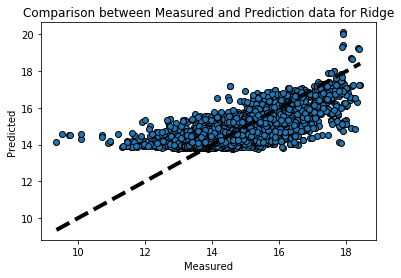

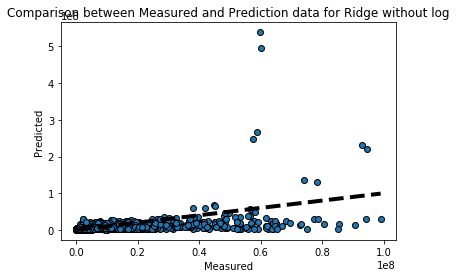

In [23]:
kpi_df=metaModelWithCrossValidation(X_scale_no_outliers,y_trans_no_outliers,lrridge,kpi_df)

### Lasso Regression

fit_time 0.006258201599121094
score_time 0.004751348495483398
test_R2 -0.2197149936917311
test_Variance 0.0
test_RMSE -1.1850559370448763
{'model_name': 'Lasso', 'fit_time': 0.006258201599121094, 'score_time': 0.004751348495483398, 'test_R2': -0.2197149936917311, 'test_Variance': 0.0, 'test_RMSE': -1.1850559370448763}
   fit_time        model_name  score_time   test_R2  test_RMSE  test_Variance
0  0.004830    DummyRegressor    0.006147 -0.219715  -1.185056       0.000000
1  0.013301  LinearRegression    0.008251  0.588878  -0.680510       0.599685
2  0.010152             Ridge    0.006155  0.450102  -0.787438       0.482646
3  0.007202             Ridge    0.006746  0.446339  -0.773916       0.480071
4  0.006258             Lasso    0.004751 -0.219715  -1.185056       0.000000
R2 score with no log: -0.032802711623763914
SMAPE with no log : 19.13150418493563


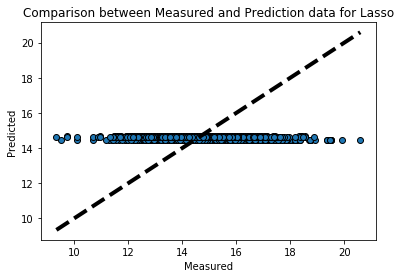

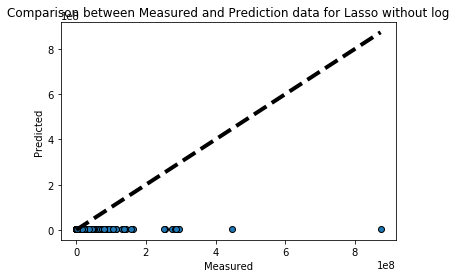

In [24]:
lrlasso=Lasso()

#metaModel(X_train, y_train,X_test,y_test,lrlasso)
kpi_df=metaModelWithCrossValidation(X_scale,y_trans,lrlasso,kpi_df)

### ElasticNet 

fit_time 0.007747220993041992
score_time 0.006141376495361328
test_R2 -0.2197149936917311
test_Variance 0.0
test_RMSE -1.1850559370448763
{'model_name': 'ElasticNet', 'fit_time': 0.007747220993041992, 'score_time': 0.006141376495361328, 'test_R2': -0.2197149936917311, 'test_Variance': 0.0, 'test_RMSE': -1.1850559370448763}
   fit_time        model_name  score_time   test_R2  test_RMSE  test_Variance
0  0.004830    DummyRegressor    0.006147 -0.219715  -1.185056       0.000000
1  0.013301  LinearRegression    0.008251  0.588878  -0.680510       0.599685
2  0.010152             Ridge    0.006155  0.450102  -0.787438       0.482646
3  0.007202             Ridge    0.006746  0.446339  -0.773916       0.480071
4  0.006258             Lasso    0.004751 -0.219715  -1.185056       0.000000
5  0.007747        ElasticNet    0.006141 -0.219715  -1.185056       0.000000
R2 score with no log: -0.032802711623763914
SMAPE with no log : 19.13150418493563


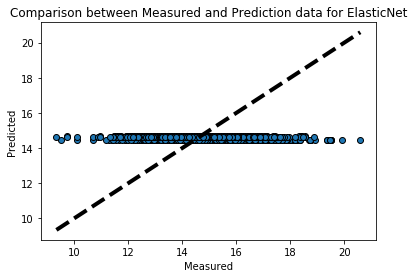

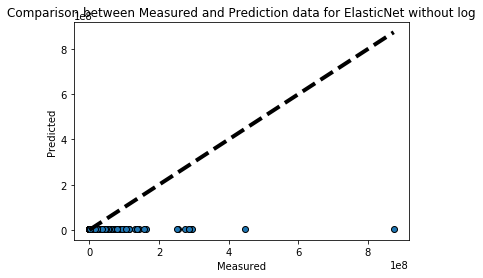

In [25]:
lrelasticnet=ElasticNet()
#metaModel(X_train, y_train,X_test,y_test,lrelasticnet)
kpi_df=metaModelWithCrossValidation(X_scale,y_trans,lrelasticnet,kpi_df)

### SGD Regression

fit_time 0.18745288848876954
score_time 0.0050982475280761715
test_R2 0.11907590242464952
test_Variance 0.20256604634988817
test_RMSE -1.003507091094869
{'model_name': 'SGDRegressor', 'fit_time': 0.18745288848876954, 'score_time': 0.0050982475280761715, 'test_R2': 0.11907590242464952, 'test_Variance': 0.20256604634988817, 'test_RMSE': -1.003507091094869}
   fit_time        model_name  score_time   test_R2  test_RMSE  test_Variance
0  0.004830    DummyRegressor    0.006147 -0.219715  -1.185056       0.000000
1  0.013301  LinearRegression    0.008251  0.588878  -0.680510       0.599685
2  0.010152             Ridge    0.006155  0.450102  -0.787438       0.482646
3  0.007202             Ridge    0.006746  0.446339  -0.773916       0.480071
4  0.006258             Lasso    0.004751 -0.219715  -1.185056       0.000000
5  0.007747        ElasticNet    0.006141 -0.219715  -1.185056       0.000000
6  0.187453      SGDRegressor    0.005098  0.119076  -1.003507       0.202566
R2 score with no lo

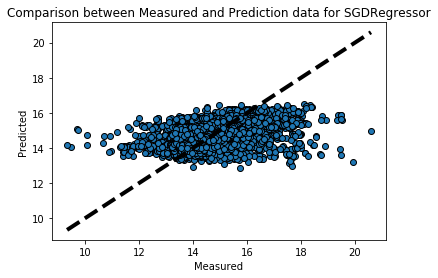

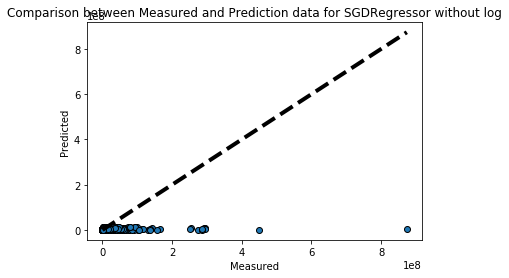

In [26]:
lrsgd =SGDRegressor()
#metaModel(X_train, y_train,X_test,y_test,lrsgd)
kpi_df=metaModelWithCrossValidation(X_scale,y_trans,lrsgd,kpi_df)

### Decision Tree Regression

fit_time 0.16598215103149414
score_time 0.006780576705932617
test_R2 0.8875697379914168
test_Variance 0.8878312154915475
test_RMSE -0.3535345729685089
{'model_name': 'DecisionTreeRegressor', 'fit_time': 0.16598215103149414, 'score_time': 0.006780576705932617, 'test_R2': 0.8875697379914168, 'test_Variance': 0.8878312154915475, 'test_RMSE': -0.3535345729685089}
   fit_time             model_name  score_time   test_R2  test_RMSE  \
0  0.004830         DummyRegressor    0.006147 -0.219715  -1.185056   
1  0.013301       LinearRegression    0.008251  0.588878  -0.680510   
2  0.010152                  Ridge    0.006155  0.450102  -0.787438   
3  0.007202                  Ridge    0.006746  0.446339  -0.773916   
4  0.006258                  Lasso    0.004751 -0.219715  -1.185056   
5  0.007747             ElasticNet    0.006141 -0.219715  -1.185056   
6  0.187453           SGDRegressor    0.005098  0.119076  -1.003507   
7  0.165982  DecisionTreeRegressor    0.006781  0.887570  -0.353535   

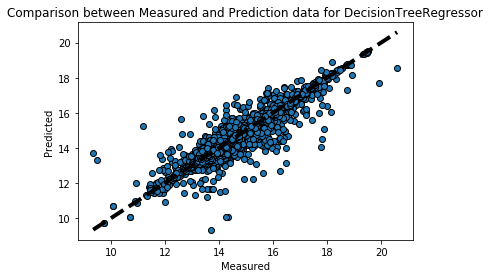

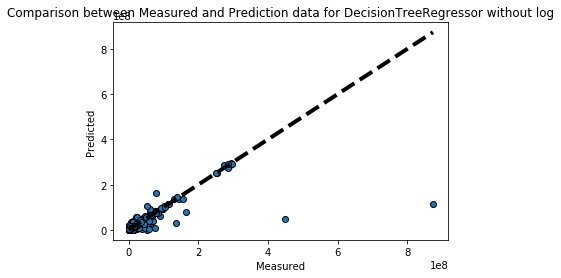

In [27]:
lrdecisiontree = DecisionTreeRegressor()

#metaModel(X_train, y_train,X_test,y_test,lrdecisiontree)
kpi_df=metaModelWithCrossValidation(X_scale,y_trans,lrdecisiontree,kpi_df)

### Random Forest Regression

fit_time 6.134502124786377
score_time 0.04514398574829102
test_R2 0.9123255384569868
test_Variance 0.9127597843170447
test_RMSE -0.31311370399969995
{'model_name': 'RandomForestRegressor', 'fit_time': 6.134502124786377, 'score_time': 0.04514398574829102, 'test_R2': 0.9123255384569868, 'test_Variance': 0.9127597843170447, 'test_RMSE': -0.31311370399969995}
   fit_time             model_name  score_time   test_R2  test_RMSE  \
0  0.004830         DummyRegressor    0.006147 -0.219715  -1.185056   
1  0.013301       LinearRegression    0.008251  0.588878  -0.680510   
2  0.010152                  Ridge    0.006155  0.450102  -0.787438   
3  0.007202                  Ridge    0.006746  0.446339  -0.773916   
4  0.006258                  Lasso    0.004751 -0.219715  -1.185056   
5  0.007747             ElasticNet    0.006141 -0.219715  -1.185056   
6  0.187453           SGDRegressor    0.005098  0.119076  -1.003507   
7  0.165982  DecisionTreeRegressor    0.006781  0.887570  -0.353535   
8  

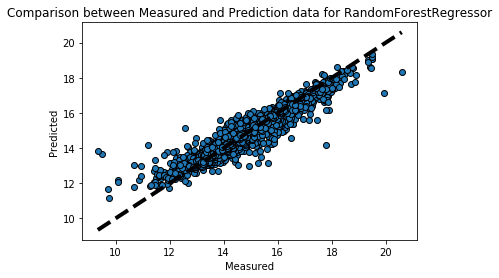

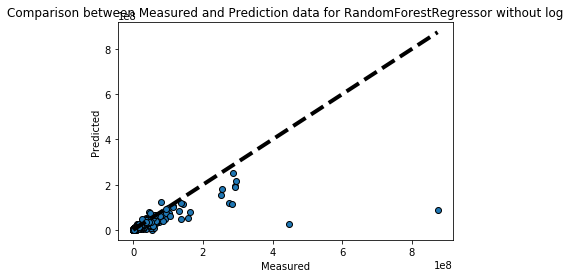

In [28]:
lrrandomforest =RandomForestRegressor()#n_estimators=750)
#metaModel(X_train, y_train,X_test,y_test,lrrandomforest)
kpi_df=metaModelWithCrossValidation(X_scale,y_trans,lrrandomforest,kpi_df)

### ExtraTrees  Regression

fit_time 2.3632360458374024
score_time 0.056740856170654295
test_R2 0.9410282201889985
test_Variance 0.9410933027096213
test_RMSE -0.2564303412139239
{'model_name': 'ExtraTreesRegressor', 'fit_time': 2.3632360458374024, 'score_time': 0.056740856170654295, 'test_R2': 0.9410282201889985, 'test_Variance': 0.9410933027096213, 'test_RMSE': -0.2564303412139239}
   fit_time             model_name  score_time   test_R2  test_RMSE  \
0  0.004830         DummyRegressor    0.006147 -0.219715  -1.185056   
1  0.013301       LinearRegression    0.008251  0.588878  -0.680510   
2  0.010152                  Ridge    0.006155  0.450102  -0.787438   
3  0.007202                  Ridge    0.006746  0.446339  -0.773916   
4  0.006258                  Lasso    0.004751 -0.219715  -1.185056   
5  0.007747             ElasticNet    0.006141 -0.219715  -1.185056   
6  0.187453           SGDRegressor    0.005098  0.119076  -1.003507   
7  0.165982  DecisionTreeRegressor    0.006781  0.887570  -0.353535   
8  

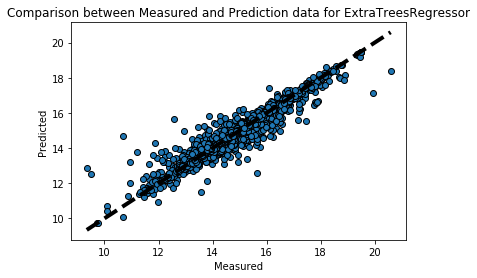

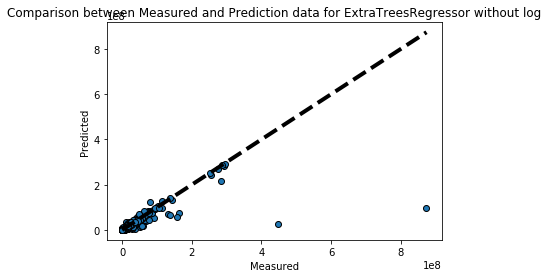

In [29]:
lrextratrees =ExtraTreesRegressor()#n_estimators=750)
#metaModel(X_train, y_train,X_test,y_test,lrextratrees)metaModelWithCrossValidation(X,y_trans,lrrandomforest)
kpi_df=metaModelWithCrossValidation(X_scale,y_trans,lrextratrees,kpi_df)

### ExtraTrees Regression without outliers

fit_time 2.160179281234741
score_time 0.05100255012512207
test_R2 0.9406130742340297
test_Variance 0.9406635893291094
test_RMSE -0.25166147788690113
{'model_name': 'ExtraTreesRegressor', 'fit_time': 2.160179281234741, 'score_time': 0.05100255012512207, 'test_R2': 0.9406130742340297, 'test_Variance': 0.9406635893291094, 'test_RMSE': -0.25166147788690113}
    fit_time             model_name  score_time   test_R2  test_RMSE  \
0   0.004830         DummyRegressor    0.006147 -0.219715  -1.185056   
1   0.013301       LinearRegression    0.008251  0.588878  -0.680510   
2   0.010152                  Ridge    0.006155  0.450102  -0.787438   
3   0.007202                  Ridge    0.006746  0.446339  -0.773916   
4   0.006258                  Lasso    0.004751 -0.219715  -1.185056   
5   0.007747             ElasticNet    0.006141 -0.219715  -1.185056   
6   0.187453           SGDRegressor    0.005098  0.119076  -1.003507   
7   0.165982  DecisionTreeRegressor    0.006781  0.887570  -0.353535

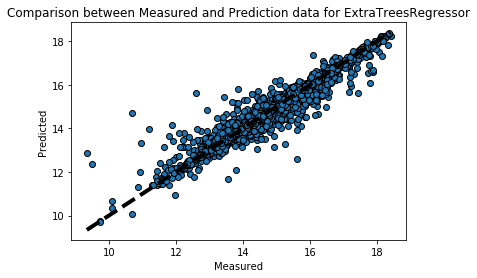

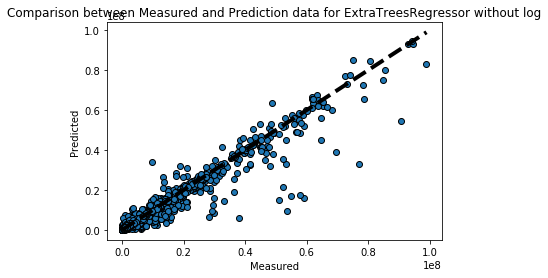

In [30]:
if (output=='energy'):
    #print(SmartData.nlargest(20, ['SiteEnergyUse(kBtu)']))
    SmartDataWithNoOutliers=SmartData.drop(SmartData.nlargest(20, outputcolumns).index.tolist())
    
else:
    #print(SmartData.loc[(SmartData['TotalGHGEmissions']>16000)|(SmartData['TotalGHGEmissions'] == 11140.56)])
    SmartDataWithNoOutliers=SmartData.drop(SmartData.loc[(SmartData['TotalGHGEmissions']>16000)|(SmartData['TotalGHGEmissions'] == 11140.56)].index.tolist())
    
X_scale_no_outliers, y_trans_no_outliers=transformInputOuput(dataconvertion,SmartDataWithNoOutliers,inputcolumns,outputcolumns)
kpi_df=metaModelWithCrossValidation(X_scale_no_outliers,y_trans_no_outliers,lrextratrees,kpi_df)

### Gradient Boosting Regressions

fit_time 2.5135411739349367
score_time 0.005925655364990234
test_R2 0.7348664680142984
test_Variance 0.7369031826936396
test_RMSE -0.5413601911714907
{'model_name': 'GradientBoostingRegressor', 'fit_time': 2.5135411739349367, 'score_time': 0.005925655364990234, 'test_R2': 0.7348664680142984, 'test_Variance': 0.7369031826936396, 'test_RMSE': -0.5413601911714907}
    fit_time                 model_name  score_time   test_R2  test_RMSE  \
0   0.004830             DummyRegressor    0.006147 -0.219715  -1.185056   
1   0.013301           LinearRegression    0.008251  0.588878  -0.680510   
2   0.010152                      Ridge    0.006155  0.450102  -0.787438   
3   0.007202                      Ridge    0.006746  0.446339  -0.773916   
4   0.006258                      Lasso    0.004751 -0.219715  -1.185056   
5   0.007747                 ElasticNet    0.006141 -0.219715  -1.185056   
6   0.187453               SGDRegressor    0.005098  0.119076  -1.003507   
7   0.165982      DecisionTr

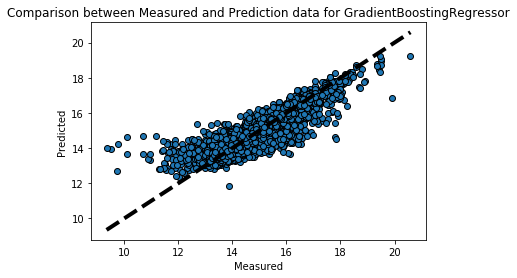

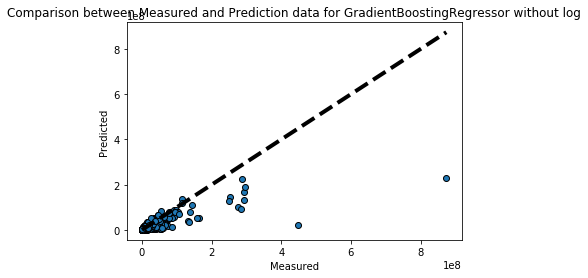

In [31]:

lrgbr =GradientBoostingRegressor()#n_estimators=500)
#metaModel(X_train, y_train,X_test,y_test,lrgbr)
kpi_df=metaModelWithCrossValidation(X_scale,y_trans,lrgbr,kpi_df)

### Gradient Boosting Regression without outliers

fit_time 2.693019962310791
score_time 0.006064367294311523
test_R2 0.7267456541253312
test_Variance 0.7287879707511823
test_RMSE -0.5388060507795022
{'model_name': 'GradientBoostingRegressor', 'fit_time': 2.693019962310791, 'score_time': 0.006064367294311523, 'test_R2': 0.7267456541253312, 'test_Variance': 0.7287879707511823, 'test_RMSE': -0.5388060507795022}
    fit_time                 model_name  score_time   test_R2  test_RMSE  \
0   0.004830             DummyRegressor    0.006147 -0.219715  -1.185056   
1   0.013301           LinearRegression    0.008251  0.588878  -0.680510   
2   0.010152                      Ridge    0.006155  0.450102  -0.787438   
3   0.007202                      Ridge    0.006746  0.446339  -0.773916   
4   0.006258                      Lasso    0.004751 -0.219715  -1.185056   
5   0.007747                 ElasticNet    0.006141 -0.219715  -1.185056   
6   0.187453               SGDRegressor    0.005098  0.119076  -1.003507   
7   0.165982      DecisionTree

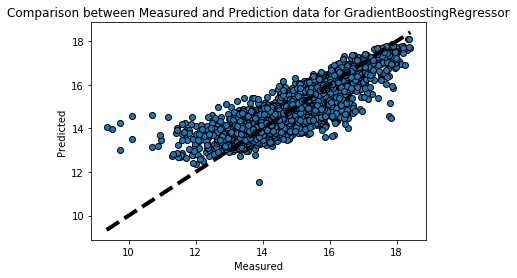

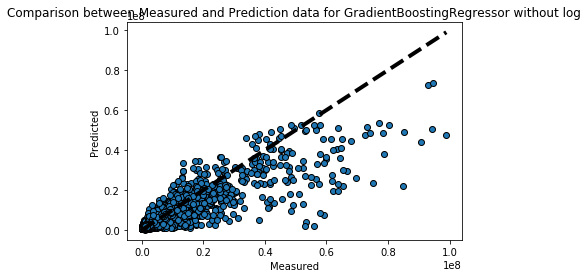

In [32]:
kpi_df=metaModelWithCrossValidation(X_scale_no_outliers,y_trans_no_outliers,lrgbr,kpi_df)

In [33]:
kpi_df

,fit_time,model_name,score_time,test_R2,test_RMSE,test_Variance
0,0.004830,DummyRegressor,0.006147,-0.219715,-1.185056,0.000000
1,0.013301,LinearRegression,0.008251,0.588878,-0.680510,0.599685
2,0.010152,Ridge,0.006155,0.450102,-0.787438,0.482646
3,0.007202,Ridge,0.006746,0.446339,-0.773916,0.480071
4,0.006258,Lasso,0.004751,-0.219715,-1.185056,0.000000
5,0.007747,ElasticNet,0.006141,-0.219715,-1.185056,0.000000
6,0.187453,SGDRegressor,0.005098,0.119076,-1.003507,0.202566
7,0.165982,DecisionTreeRegressor,0.006781,0.887570,-0.353535,0.887831
8,6.134502,RandomForestRegressor,0.045144,0.912326,-0.313114,0.912760
9,2.363236,ExtraTreesRegressor,0.056741,0.941028,-0.256430,0.941093


### Display some statistics

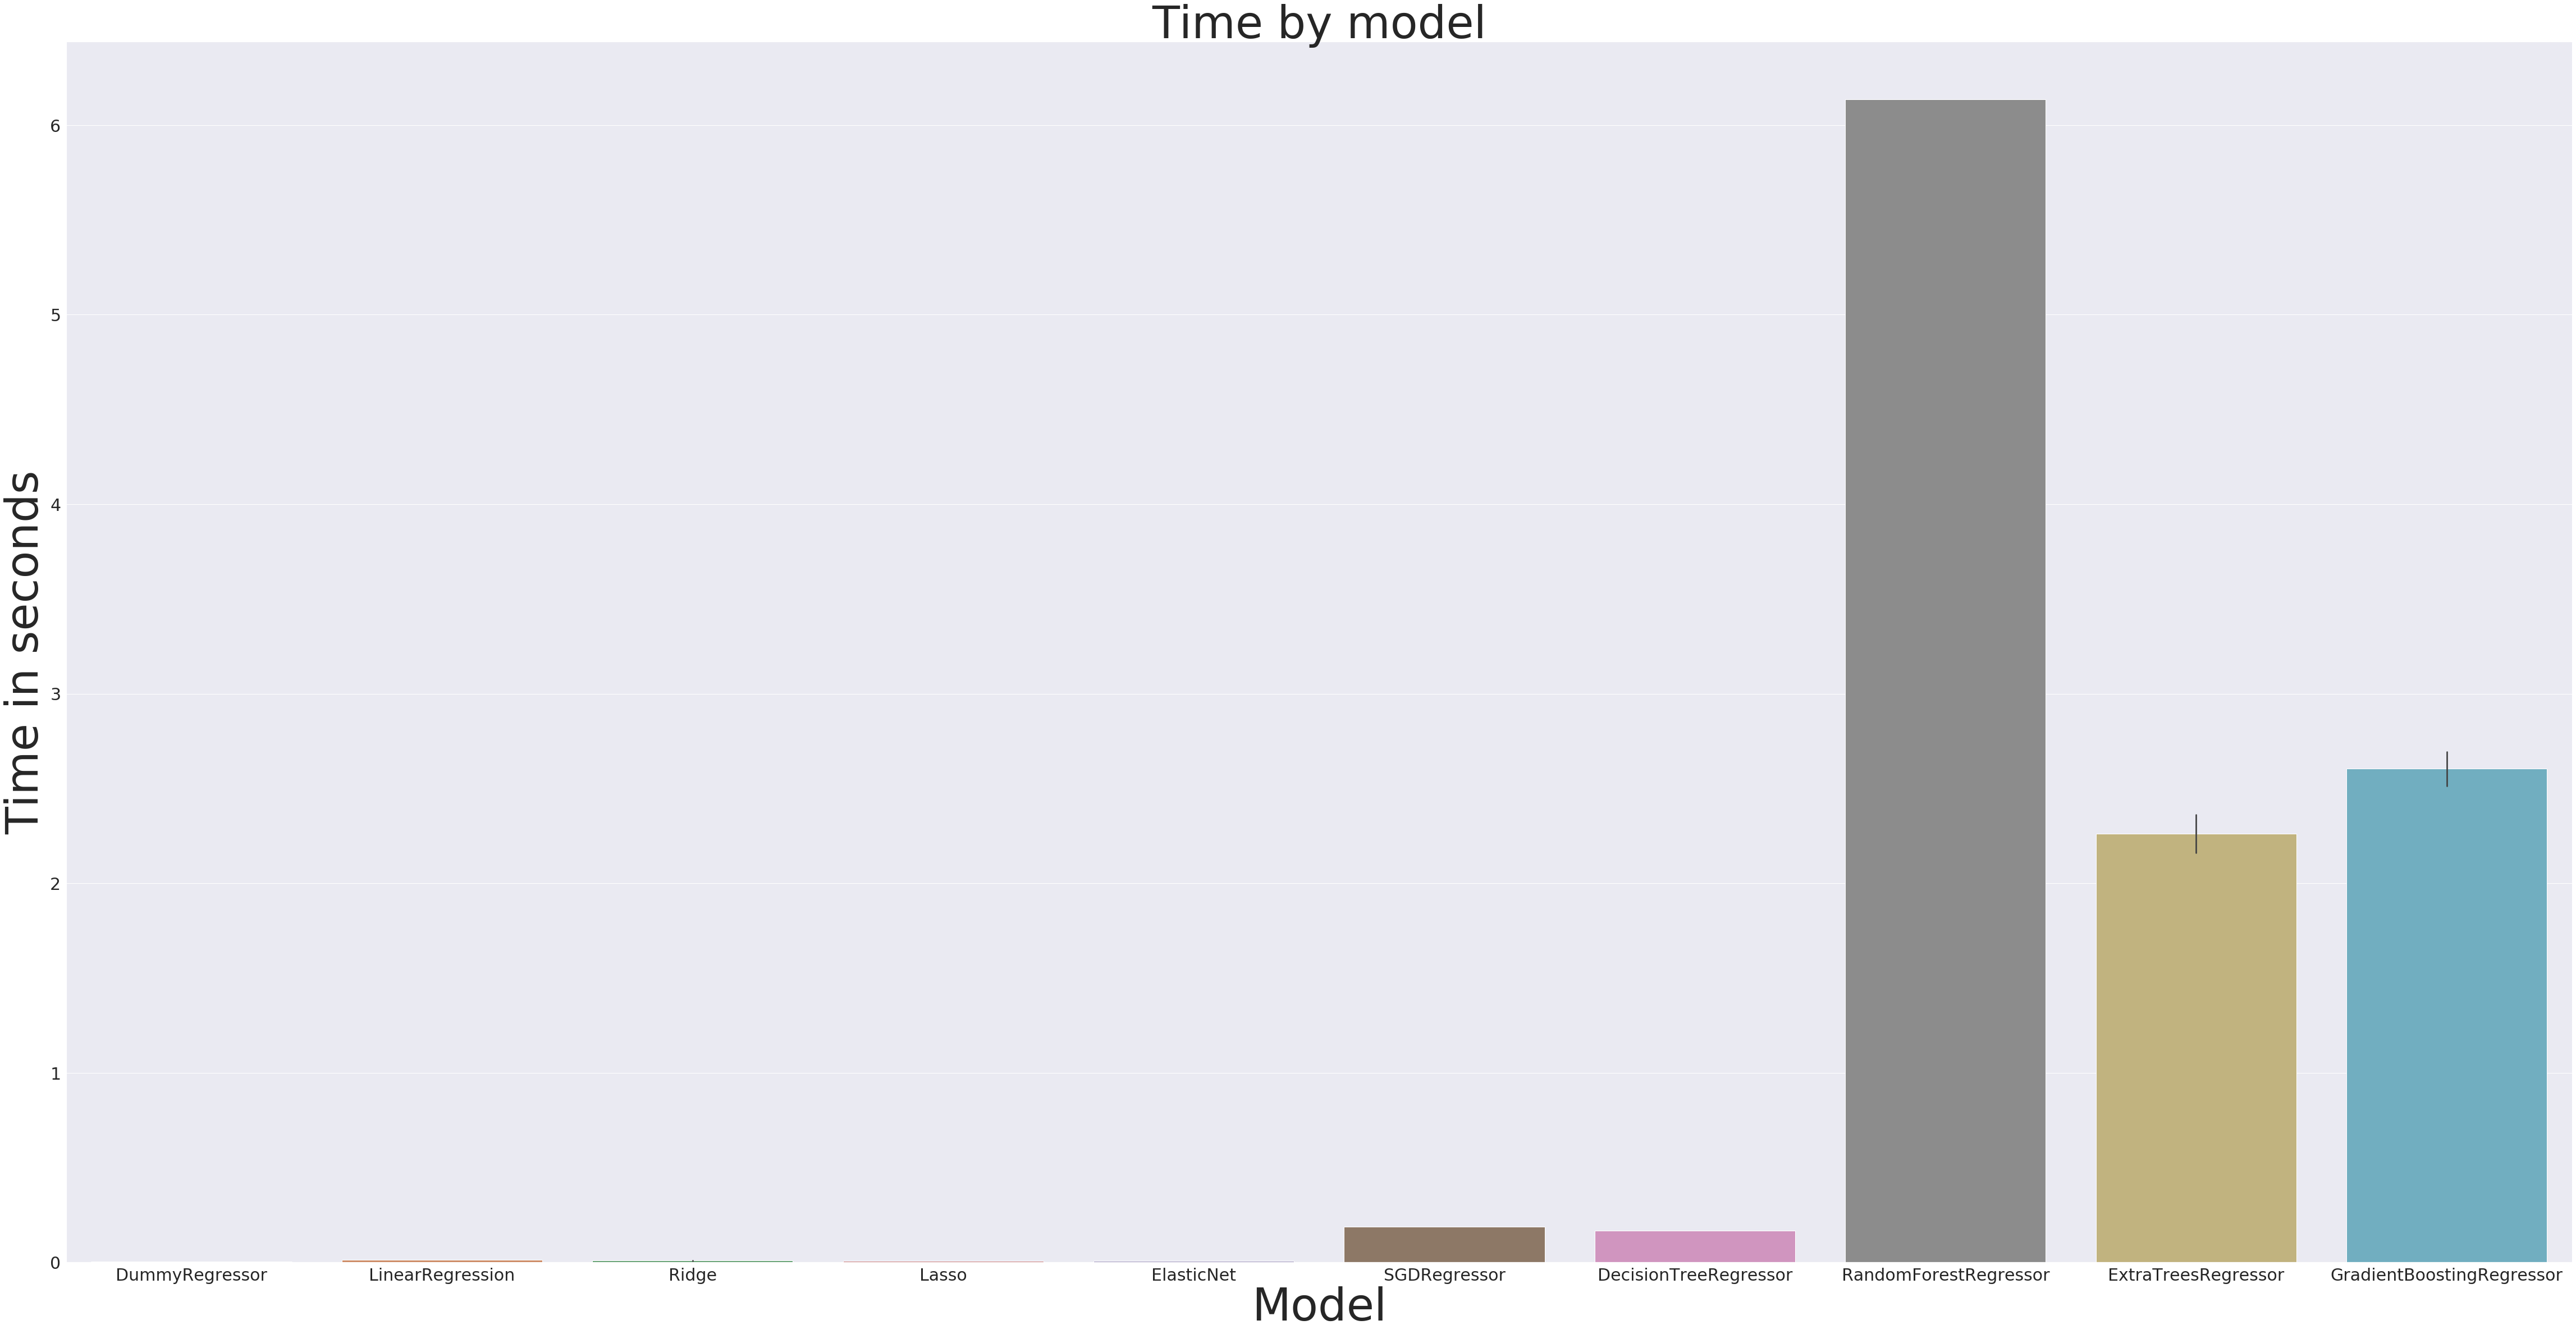

In [34]:

sns.set(color_codes=True)
plt.figure(figsize=(80,40))
ax = sns.barplot(x="model_name", y="fit_time", data=kpi_df)
ax.set_title('Time by model',fontsize=80)
ax.set_xlabel('Model',fontsize=80)
ax.set_ylabel('Time in seconds',fontsize=80)
ax.tick_params(labelsize=30)
ax.figure.savefig("./"+output+"_"+encoding+"_"+"timebymodel.png")

plt.show()


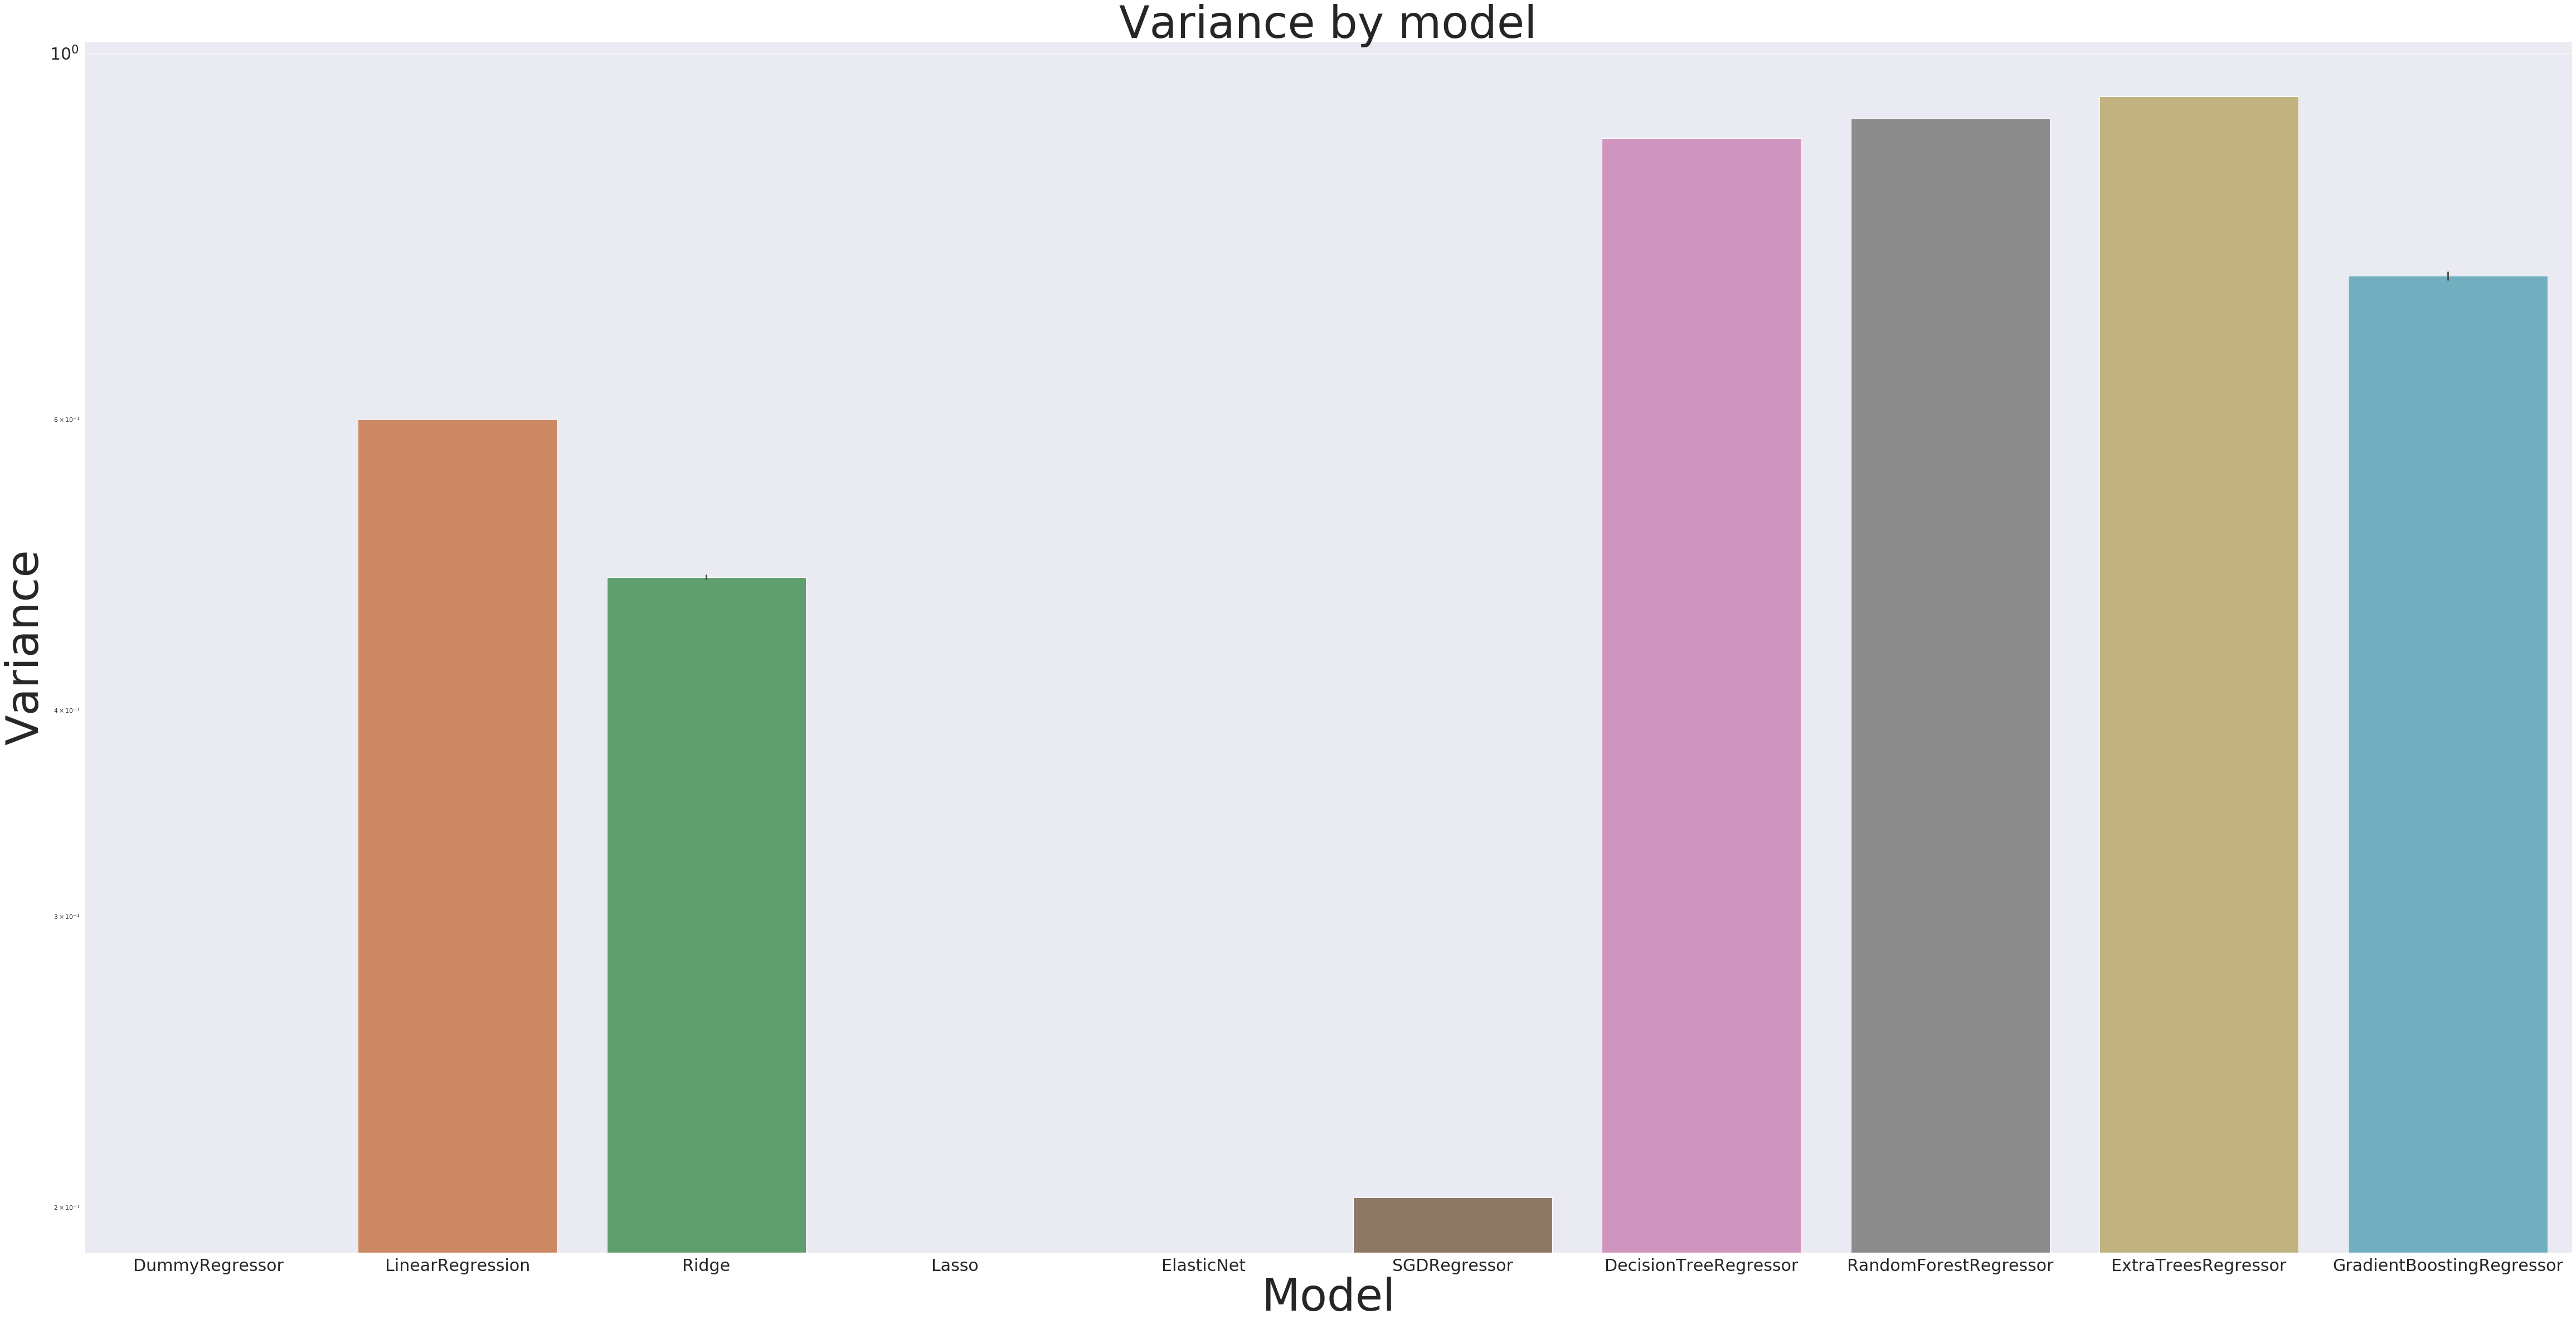

In [35]:
sns.set(color_codes=True)
plt.figure(figsize=(80,40))
ax = sns.barplot(x="model_name", y="test_Variance", data=kpi_df)
ax.set_title('Variance by model',fontsize=80)
ax.set_xlabel('Model',fontsize=80)
ax.set_ylabel('Variance',fontsize=80)
ax.tick_params(labelsize=30)
ax.set_yscale("log")
ax.figure.savefig("./"+output+"_"+encoding+"_"+"variancebymodel.png")

plt.show()


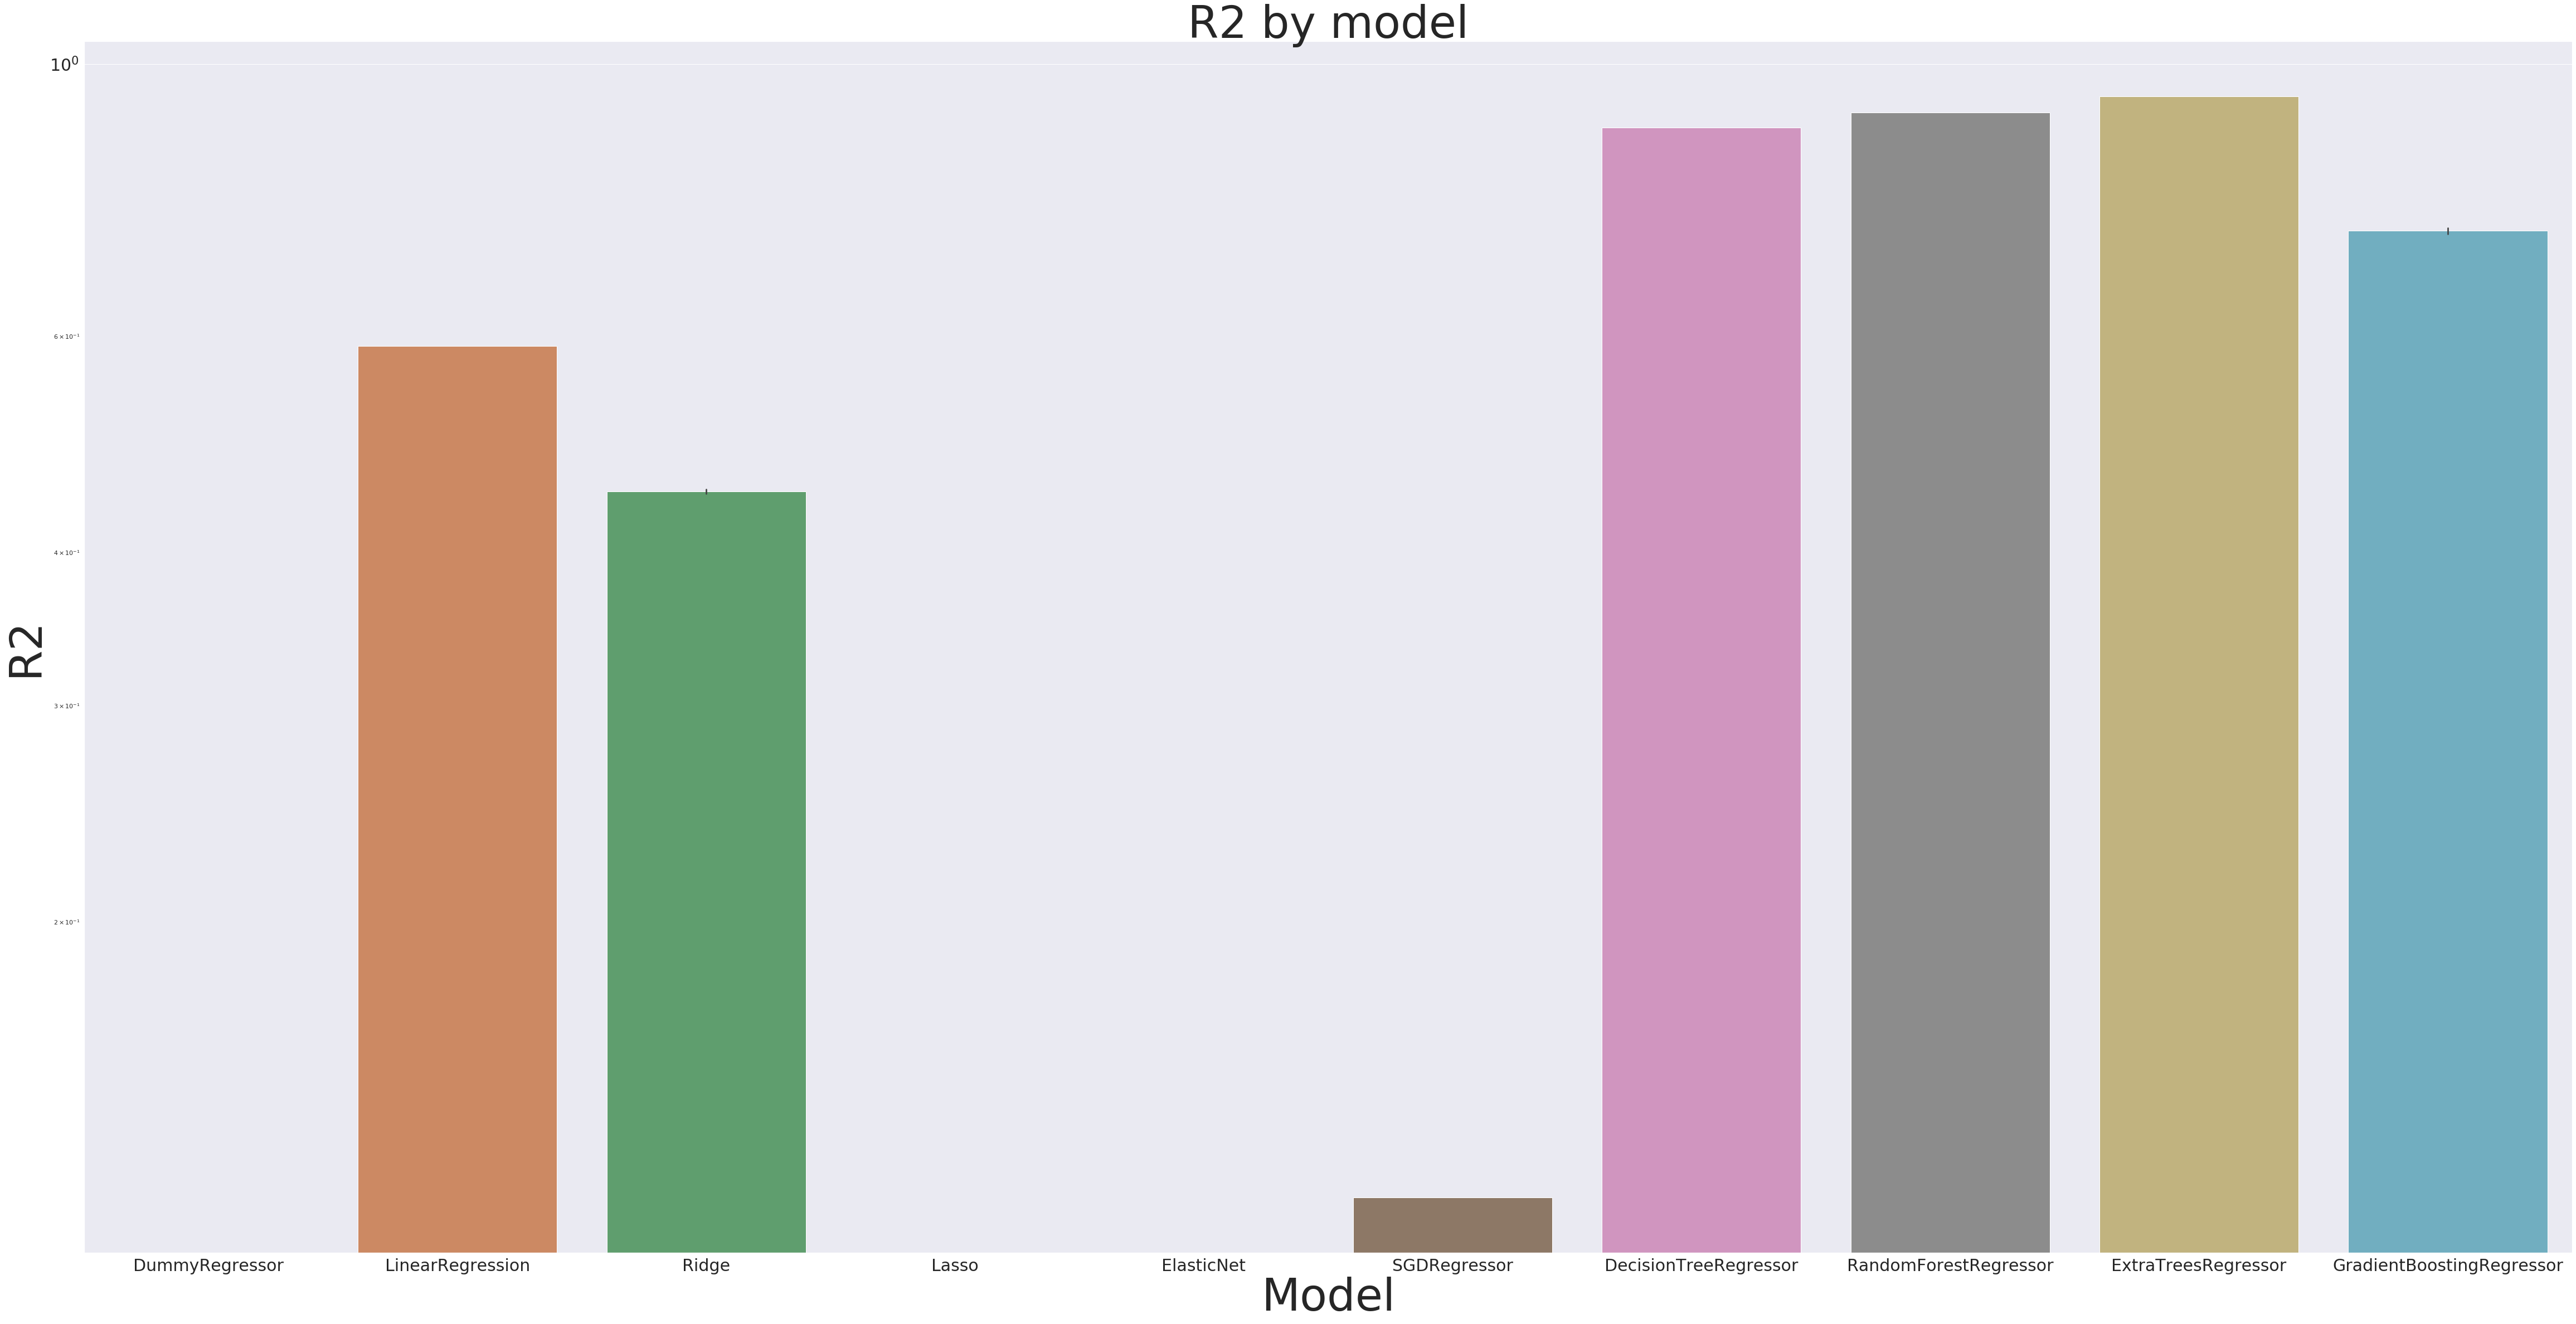

In [36]:
sns.set(color_codes=True)
plt.figure(figsize=(80,40))
ax = sns.barplot(x="model_name", y="test_R2", data=kpi_df)
ax.set_title('R2 by model',fontsize=80)
ax.set_xlabel('Model',fontsize=80)
ax.set_ylabel('R2',fontsize=80)
ax.tick_params(labelsize=30)
ax.set_yscale("log")
ax.figure.savefig("./"+output+"_"+encoding+"_"+"r2bymodel.png")

plt.show()

### Analysis of the EnergyScore

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scale_no_outliers, y_trans_no_outliers, test_size=0.33, random_state=1)

In [38]:
lrextratrees.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [39]:
importances = lrextratrees.feature_importances_

In [40]:
importances

array([0.05160071, 0.00718151, 0.02079473, 0.16349257, 0.00906624,
       0.13043559, 0.11039555, 0.0793186 , 0.00394901, 0.12746407,
       0.04615111, 0.10213939, 0.02412182, 0.02223862, 0.02726447,
       0.03350131, 0.02316454, 0.01772018])

Feature ranking:
1. feature 3 (0.163493)
2. feature 5 (0.130436)
3. feature 9 (0.127464)
4. feature 6 (0.110396)
5. feature 11 (0.102139)
6. feature 7 (0.079319)
7. feature 0 (0.051601)
8. feature 10 (0.046151)
9. feature 15 (0.033501)
10. feature 14 (0.027264)
11. feature 12 (0.024122)
12. feature 16 (0.023165)
13. feature 13 (0.022239)
14. feature 2 (0.020795)
15. feature 17 (0.017720)
16. feature 4 (0.009066)
17. feature 1 (0.007182)
18. feature 8 (0.003949)


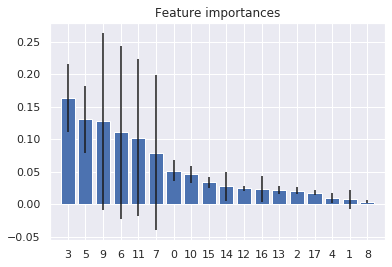

In [41]:
std = np.std([tree.feature_importances_ for tree in lrextratrees.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [42]:
X_train

array([[1.51099898e-05, 2.22205732e-07, 2.22205732e-07, ...,
        4.52787064e-01, 3.12033232e-01, 3.53974175e-01],
       [1.98456867e-05, 2.54431881e-07, 1.01772752e-06, ...,
        3.34414324e-01, 4.93244984e-01, 4.05310495e-01],
       [0.00000000e+00, 1.74535014e-07, 5.23605042e-07, ...,
        5.66597183e-01, 4.42753573e-01, 2.78034626e-01],
       ...,
       [2.21900588e-05, 3.21595055e-07, 1.28638022e-06, ...,
        4.22690712e-01, 4.51601062e-01, 5.12301566e-01],
       [5.54946144e-06, 7.02463474e-08, 1.68591234e-06, ...,
        2.28042395e-01, 1.61804453e-01, 1.11902572e-01],
       [1.01880286e-05, 3.08728141e-07, 9.26184422e-07, ...,
        4.05778993e-01, 4.33532649e-01, 4.91804545e-01]])

In [43]:
inputcolumns

['ENERGYSTARScore',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'IsSiteEUI(kBtu/sf)',
 'IsSourceEUI(kBtu/sf)',
 'IsSteamUse(kBtu)',
 'IsElectricity(kBtu)',
 'IsNaturalGas(kBtu)',
 'IsGHGEmissionsIntensity',
 'TE_SiteEnergyUse(kBtu)_BuildingType',
 'TE_SiteEnergyUse(kBtu)_Neighborhood',
 'TE_SiteEnergyUse(kBtu)_PrimaryPropertyType',
 'TE_SiteEnergyUse(kBtu)_LargestPropertyUseType',
 'TE_SiteEnergyUse(kBtu)_SecondLargestPropertyUseType',
 'TE_SiteEnergyUse(kBtu)_ThirdLargestPropertyUseType']

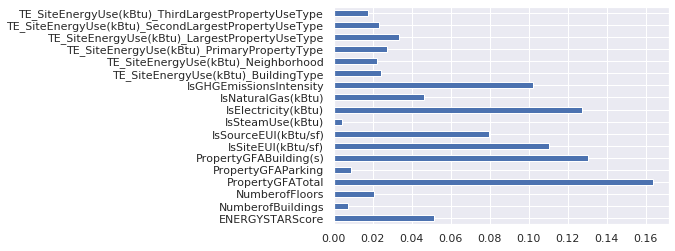

In [44]:
pd.Series(lrextratrees.feature_importances_, index=inputcolumns).plot(kind='barh')

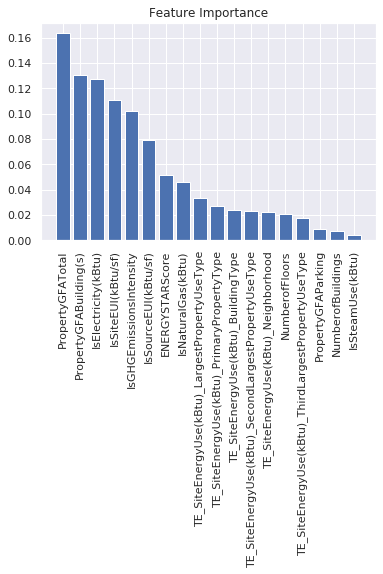

In [45]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [inputcolumns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Hyperparameters for the Extra Trees Regressor model

In [ ]:
lrextratrees=ExtraTreesRegressor()

from sklearn.metrics.scorer import make_scorer

def custom_r2_func(myX, X_predicted):
    return r2_score(np.expm1(myX),np.expm1(X_predicted))
    
#makescorer(custom_r2_func)

custom_r2scorer = make_scorer(custom_r2_func, greater_is_better=True)

#param_grid = {
 #   'max_depth': [80, 90, 100, 110],
  #  'max_features': [2, 3],
   # 'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    #'n_estimators': [100, 200, 300, 1000]
#}

param_grid={
    'n_estimators':[500], 
    #'max_depth':[1,2,3,4,6], 
    #'min_samples_leaf':[3,4], 
    'max_features':[3,4,5,6] 
} 


#lrextratrees_grid=GridSearchCV(estimator=lrextratrees,param_grid=param_grid,scoring = 'r2',verbose=1,n_jobs=-1, cv=5)

lrextratrees_grid=GridSearchCV(estimator=lrextratrees,param_grid=param_grid,scoring = custom_r2scorer,verbose=1,n_jobs=1, cv=5)

#grid_result=grid.fit(X_scale,y_trans)

lrextratrees_grid_result=lrextratrees_grid.fit(X_scale_no_outliers,y_trans_no_outliers)
print('Best score :' ,lrextratrees_grid_result.best_score_)
print('Best params :', lrextratrees_grid_result.best_params_)


newlrextratrees=ExtraTreesRegressor(max_features=lrextratrees_grid_result.best_params_.get('max_features'), n_estimators= 1000)
newlrextratrees_result=newlrextratrees.fit(X_scale_no_outliers,y_trans_no_outliers)
lrextratrees__rr= newlrextratrees.predict(X_scale_to_generate)

print('Estimated Data  '+str(lrextratrees__rr))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
